### BIKE SHARING ASSIGNMENT

###### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily   bike demands across the American market based on some factors. 

##### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Import Libraries

In [1]:
# Required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Training libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,classification_report
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

# Api
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading data from CSV

In [2]:
bike_df = pd.read_csv('day.csv')

##### Glancing data frame to get an overview

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Understanding

###### Checking shape of the data ingested

In [4]:
bike_df.shape

(730, 16)

###### Checking null values and data type of the dataframe

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Finding the statistical information for columns in our dataframe

In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### There are 730 row and 16 columns that contains no null values as inspected.

### Data Cleaning 

##### Removing columns that are not useful for analysis

In [7]:
# Since instant is nothing but row number in our dataframe we can drop it.
# As month and weekday columns are already present in our dataframe 'dteday' can be dropped since it provides same information.
# As mentioned in the model building that the model should be built taking this 'cnt' as the target variable, hence we can drop 
# casual and registered as their sum is mentioned in 'cnt'
bike_df = bike_df.drop(['instant','dteday','casual','registered'],axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
#  We found that features (season, mnth, weekday and weathersit) are integers instead they should be categorical string variables.

bike_df.season = bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

bike_df.weathersit = bike_df.weathersit.replace({1:'clear',2:'mist',3:'rain',4:'snow/fog/heavy rain'})

bike_df.mnth = bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### EDA

In [9]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# season

bike_df.season.value_counts()

# As mentioned in the data preparation section, there are 4 values for season, hence this is an important variable for analysis  

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# weather_sit

bike_df.weathersit.value_counts()

# As mentioned in the data preparation section, there are 3 values for weather, hence this is an important variable for analysis 

clear    463
mist     246
rain      21
Name: weathersit, dtype: int64

In [12]:
# Calculating correlation in our dataframe

bike_df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


### Finding and removing outliers

In [13]:
#Finding unique values for the columns in dataframe
bike_df.nunique()

# We can see that temp, atemp, hum, windspeed and cnt are having a high number of unique values. Since cnt is our target variable
# we will choose the other 4 for outlier detection. We will drop the remaining variables as they are mostly categorical in nature.

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

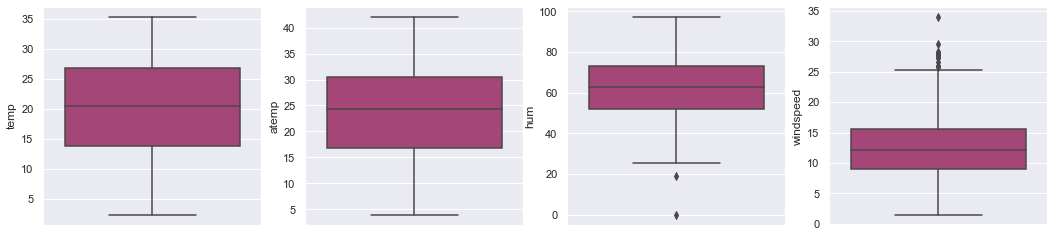

In [14]:
# Drawing box plots for the shortlisted continuous variables
columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in columns:
    sns.set(style="darkgrid")
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df,palette="magma_r")
    i+=1

plt.show()

In [15]:
# As we can infer that there are outliers in hum and windspeed but we need to keep these outliers as they will affect our target 
# variable i.e. cnt

<Figure size 1080x2160 with 0 Axes>

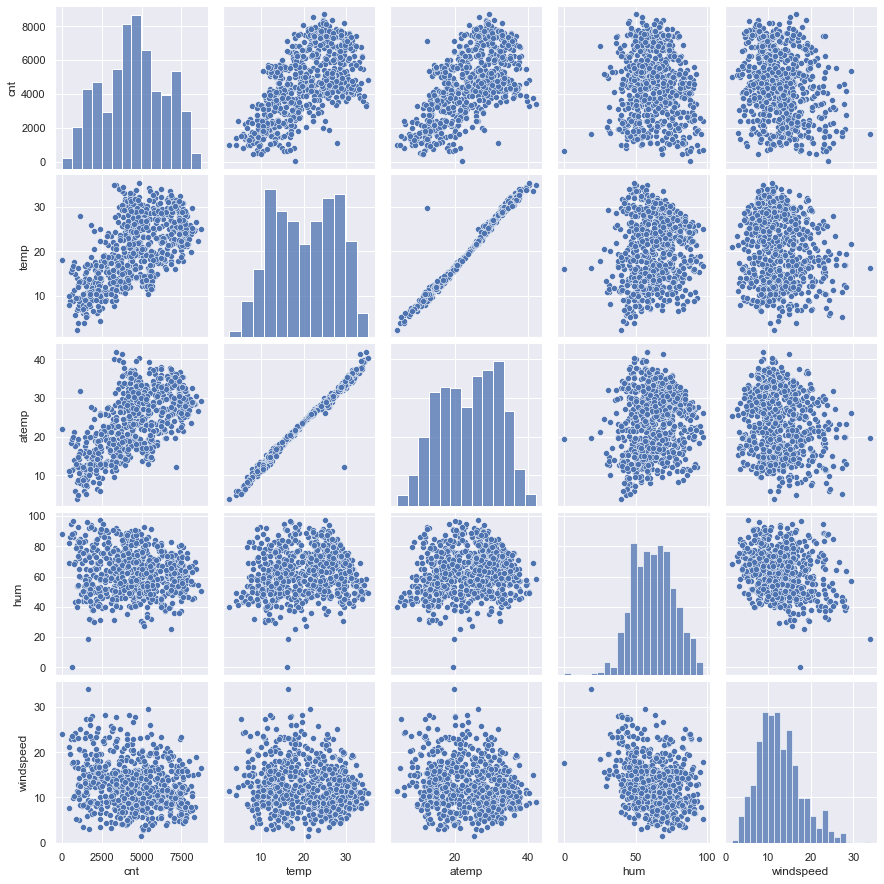

In [16]:
#Drawing pairplots for finding correlation between continuous numeric variables
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [17]:
# Since temp and atemp shows a linear graph, we can infer that temp and atemp highlights highest corelation with the target
# variable 'cnt'. Hence, temp and atemp are highly correlated with each other. 
# We can see that cnt is linearly increasing with temp,hence it is a linear relationship.
# Hum is values are highly scattered.
# Although we can see cnt decreasing with increase in humidity.
# Windspeed is values are more scattered around.
# Although we can see cnt decreasing with increase in windspeed.

<Figure size 1080x2160 with 0 Axes>

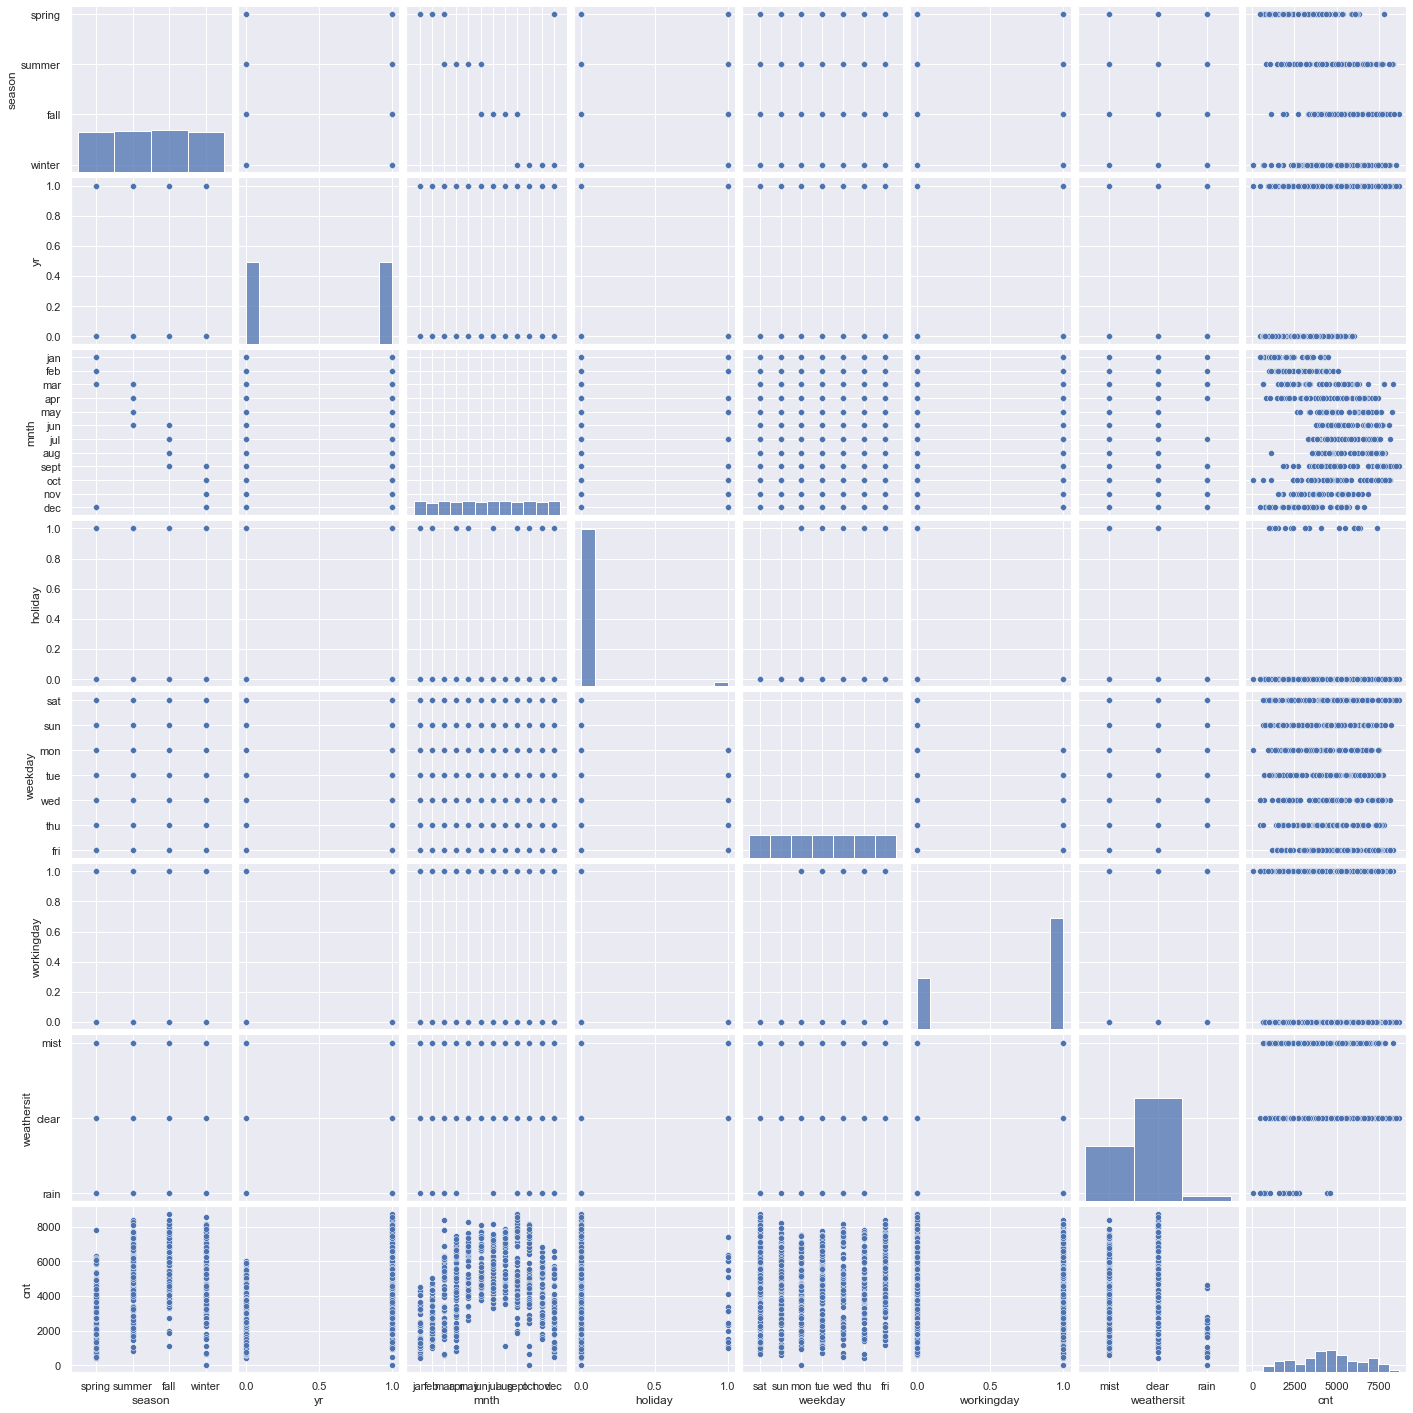

In [18]:
#Drawing pairplots for finding correlation between numerical variables

plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['season', 'yr', 'mnth', 'holiday','weekday','workingday','weathersit','cnt'])
plt.show()

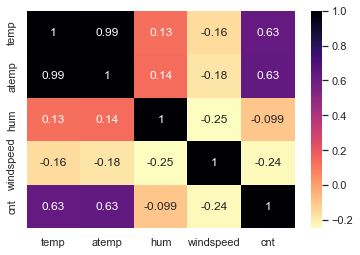

In [19]:
# Finding continuous variables relationship with each other
sns.heatmap(bike_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='magma_r', annot = True)
plt.show()

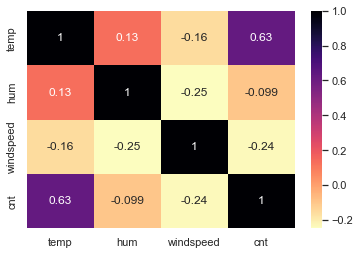

In [20]:
# We can infer that temp and atemp has correlation
# It seems that atemp has been derived from temp so atemp field, thus we can drop it

sns.heatmap(bike_df[['temp','hum','windspeed','cnt']].corr(), cmap='magma_r', annot = True)
plt.show()

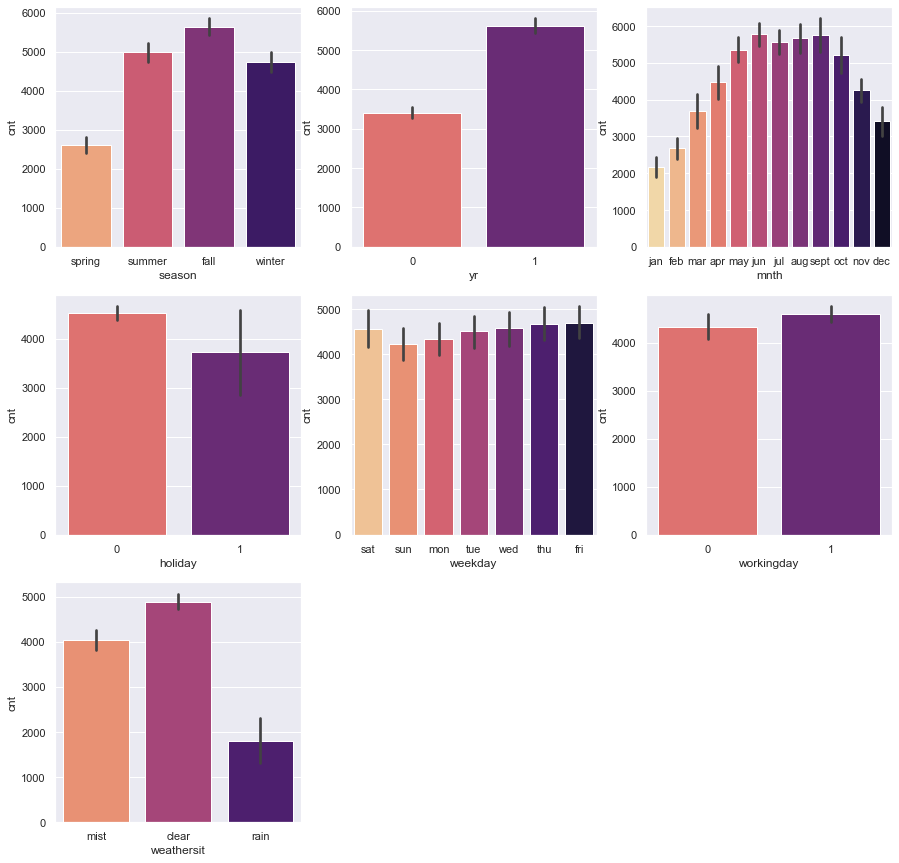

In [21]:
# Barplot for categorical variables to visualize sales
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(data=bike_df, x=i[1], y='cnt', palette='magma_r')
plt.show()

In [22]:
# Season 3 has the highest demand for rental bikes
# We can observe that the demand for next year has grown significantly
# We can observe that the demand is incrementing per month and reaches its peak in September. After September, the demand begins to decline
# The demand is slightly less on holidays as compared to workdays.
# The demand for weekday is almost similar for each day.
# The clear weater has the highest demand
# During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

### Data Preparation for Linear Regression


In [23]:
# Dropping the first columns as (p-1) dummies can explain p categories(as explained in videos)

bike_df = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday"],drop_first=True)
bike_df = pd.get_dummies(data=bike_df,columns=["weathersit"])

In [24]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_clear', 'weathersit_mist',
       'weathersit_rain'],
      dtype='object')

In [25]:
# Assigning y as target variable
y=bike_df.pop('cnt')

X=bike_df

#Train Test split with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [26]:
# Inferring shape and size of test and train sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 30), (146, 30), (584,), (146,))

In [27]:
# Scaling continuous variables
cont_var= ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()
X_train[cont_var] = scaler.fit_transform(X_train[cont_var])

C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


### Model Training

### Building Models using RFE and VIF approach(as per video lectures)

In [28]:
# Building an LR model using SKLearn
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
import warnings
warnings.filterwarnings('ignore')

### Usnig RFE to eliminate columns

In [30]:
#Total number of features are 30
len(X_train.columns)

30

In [31]:
# Selecting the features by using an automated approach
# Selecting half of the features out of total
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [32]:
# Seeing top 15 columns selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'weathersit_clear', 'weathersit_mist', 'weathersit_rain'],
      dtype='object')

In [33]:
# Using api online to build model
def model_api(columns):
    X_train_sm = sm.add_constant(X_train[columns])
    intermediate = sm.OLS(y_train, X_train_sm).fit()
    print(intermediate.summary())
    return intermediate

In [34]:
# Calculating VIF
def fetch_vif(input_columns):
    intermediate_df = X_train[input_columns]
    vif_df = pd.DataFrame()
    vif_df['Features'] = intermediate_df.columns
    vif_df['VIF'] = [variance_inflation_factor(intermediate_df.values, i) for i in range(intermediate_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'],2)
    print(vif_df.sort_values(by='VIF',ascending=False))

In [35]:
# We will eliminate top 10 columns as shortlisted by RFE
X_train_rfe = X_train[list(X_train.columns[rfe.support_])]

In [36]:
X_train_rfe.shape

(584, 15)

### Building a model and checking the result by taking all columns selected by RFE


In [37]:
shortlisted_columns = list(X_train.columns[rfe.support_])

model_api(shortlisted_columns)
fetch_vif(shortlisted_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     213.8
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.75e-209
Time:                        23:50:35   Log-Likelihood:                -4724.0
No. Observations:                 584   AIC:                             9476.
Df Residuals:                     570   BIC:                             9537.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1496.5740    184.620  

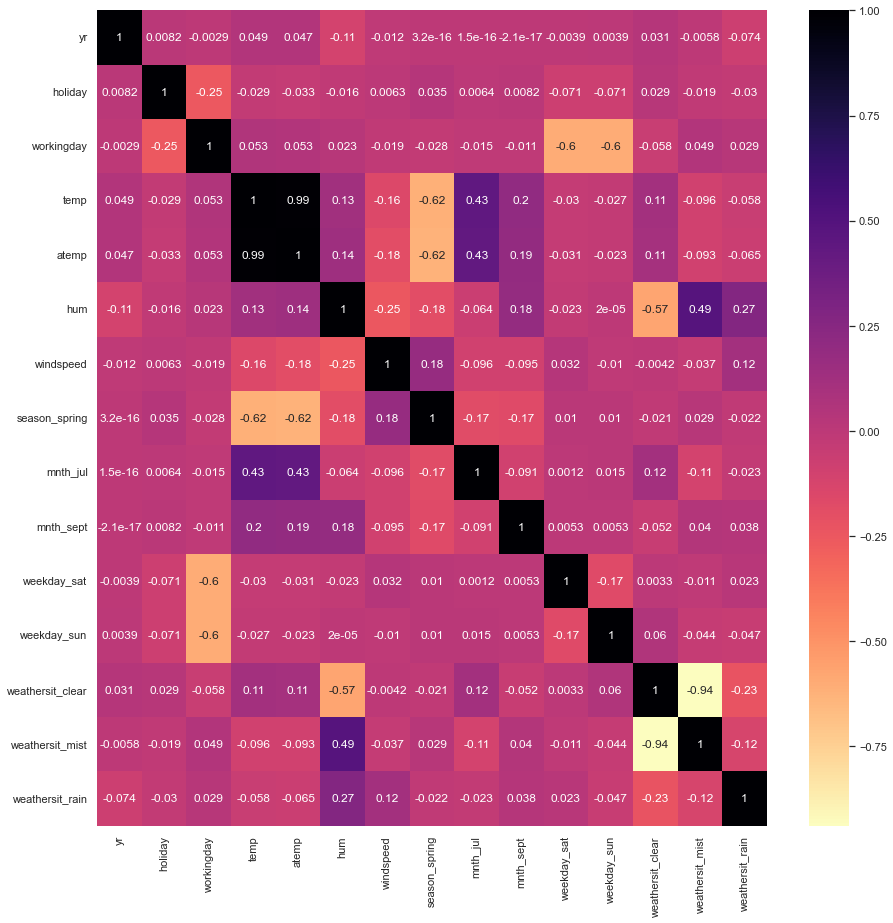

In [38]:
# Visualizing impact of different features on the target var.
plt.figure(figsize = (15,15))
sns.heatmap(bike_df[shortlisted_columns].corr(), cmap='magma_r', annot=True)
plt.show()

In [39]:
#Dropping variable "holiday","workingday","weekday_sat","weekday_sun","weathersit_clear", "weathersit_mist","weathersit_rain" 
#because it is insignificant due its high p-value


In [40]:
# Rebuilding the model
shortlisted_columns =[x for x in list(X_train.columns[rfe.support_]) if x not in list(["holiday","workingday","weekday_sat",
                                                                                        "weekday_sun","weathersit_clear",
                                                                                        "weathersit_mist","weathersit_rain"]) ]

model_api(shortlisted_columns)
fetch_vif(shortlisted_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     286.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.84e-195
Time:                        23:50:36   Log-Likelihood:                -4771.6
No. Observations:                 584   AIC:                             9561.
Df Residuals:                     575   BIC:                             9601.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4140.5309    240.753     17.198

In [41]:
# As atemp and temp are similar and are highly correlated, we can remove one of them.
# We will also remove humidity as it has high VIF compared to others

In [42]:
shortlisted_columns =[x for x in list(X_train.columns[rfe.support_]) if x not in list(["atemp","hum","holiday","workingday","weekday_sat",
                                                                                        "weekday_sun","weathersit_clear",
                                                                                        "weathersit_mist","weathersit_rain"]) ]

model_api(shortlisted_columns)
fetch_vif(shortlisted_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     317.1
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          5.12e-179
Time:                        23:50:36   Log-Likelihood:                -4815.3
No. Observations:                 584   AIC:                             9645.
Df Residuals:                     577   BIC:                             9675.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2462.1790    156.948     15.688

In [43]:
# Based on the above statistics, we will select the last model as the final one due to underlying reasons:
# VIF is picturing out to be acceptable
# The p value close to 0
# R2 and adjacent R2 looks apt

### Final Model

In [44]:
final_shortlisted_columns= shortlisted_columns

In [45]:
# lets build the final model using sklearn
lr_model = LinearRegression()
lr_fit_model=lr_model.fit(X_train[final_shortlisted_columns],y_train)

### Final Model Eval


### Residual Analysis


In [46]:
# Residual Analysis on all the final selected columns
# on training data
y_train_pred = lr_fit_model.predict(X_train[final_shortlisted_columns])

Text(0.5, 0, 'Errors')

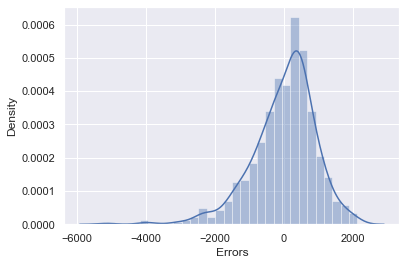

In [47]:
#visualize the errors
sns.distplot(y_train-y_train_pred)
plt.xlabel('Errors')

In [48]:
# It can be observed that errors are normally distributed with the mean near to 0


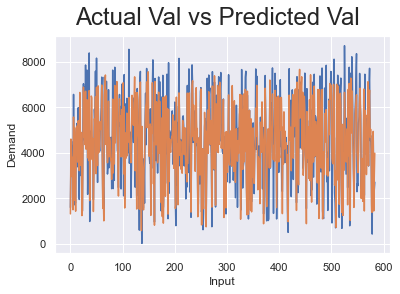

In [49]:
# Actual Values vs Predicted Values
intermediate_val = [i for i in range(0,len(X_train),1)]
plt.plot(intermediate_val,y_train)
plt.plot(intermediate_val,y_train_pred)
plt.suptitle('Actual Val vs Predicted Val', fontsize = 24)
plt.xlabel('Input')
plt.ylabel('Demand')
plt.show()

In [50]:
# The pattern looks to be similar suggesting our model is good enough


In [51]:
#Printing R-squared Value
r2_score(y_train,y_train_pred)

0.767311375843533

### Linearity Check


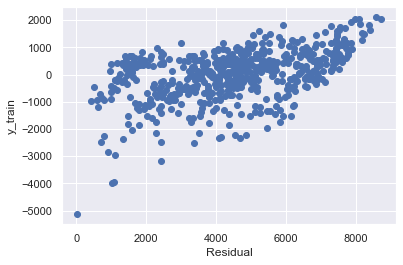

In [52]:
# Plotting the scatter plot
res = (y_train - y_train_pred)
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [53]:
# Prediction for test set


In [54]:
#Scaling variables in X_test
select_var = ['temp','atemp','hum','windspeed']

#Test data to be transformed strictly with no fitting
X_test[select_var] = scaler.transform(X_test[select_var])

In [55]:
#Predicting on test data
y_test_pred = lr_fit_model.predict(X_test[shortlisted_columns])

### Calculate R2 for test set

In [56]:
# calculating R2 between test and predicted test sets
r2_score(y_test,y_test_pred)

0.7440321989722659

In [57]:
# R2 value on test set and train set are close enough which depicts that our model is good

Text(0, 0.5, 'demand')

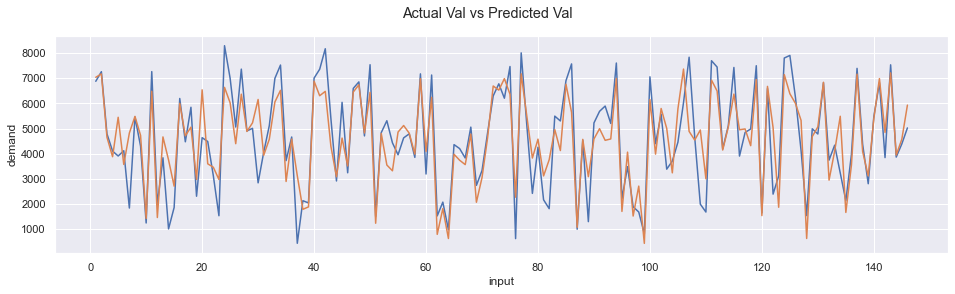

In [58]:
# Visualize pattern on test set to understand the distribution clearly
temp = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(16,4))
plt.plot(temp,y_test, linestyle="-")
plt.plot(temp,y_test_pred, linestyle="-")
fig.suptitle('Actual Val vs Predicted Val')
plt.xlabel('input')
plt.ylabel('demand')

In [59]:
# From above graph we can infer that the variance appears to be constant across the predictions


Text(0.5, 0, 'Errors')

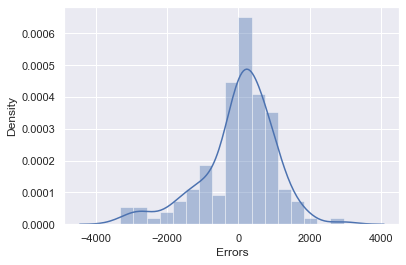

In [60]:
#visualize the errors
sns.distplot(y_test-y_test_pred)
plt.xlabel('Errors')

### Final Inference


In [61]:
# After analysing the final model, following points are suggested- 
# Spring and winter season are peak seasons which the company should target
# The demands for bike are forecasted to be increased in the next year also as suggested by the historical data
# Light rain/snow will face lesser demands for bike as per the statistics caluclated

### Overview

In [62]:
#As soon as the Covid impact starts reducing,
#the industry should focus on acquiring new customers and should introduce new offers to retain old customers during the 
#spring break.


### Significant variables that impacted the bike demands


- temp
- windspeed
- yr
- season_spring
- mnth_jul
- mnth_sept